Missing: 0
Missing: 0
X train shape:  (49000, 12)
X validation shape:  (10500, 12)
X test shape:  (10500, 12)
Y train shape:  (49000,)
Y validation shape:  (10500,)
Y test shape:  (10500,)


(70000, 14)

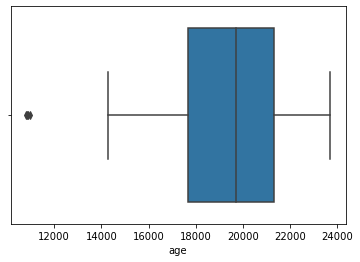

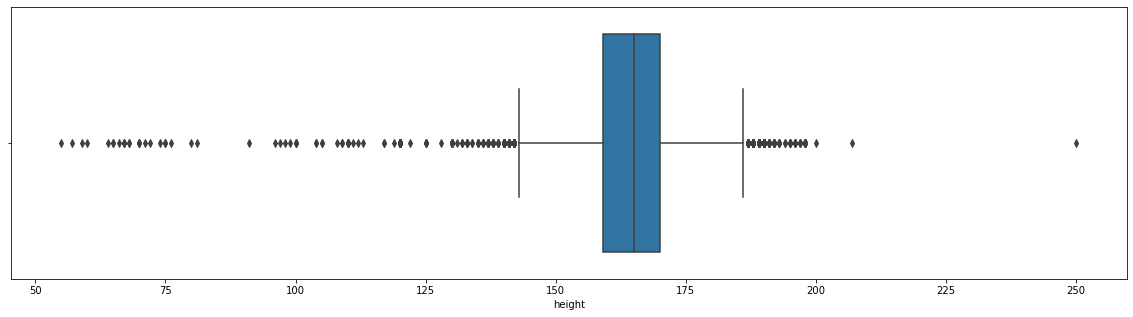

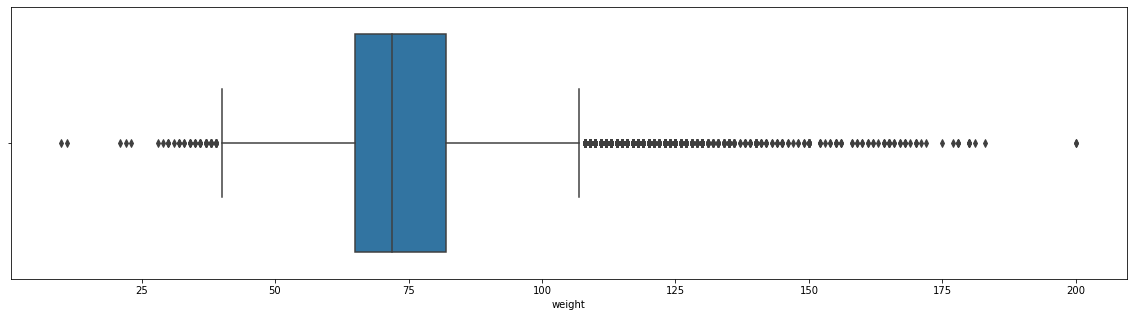

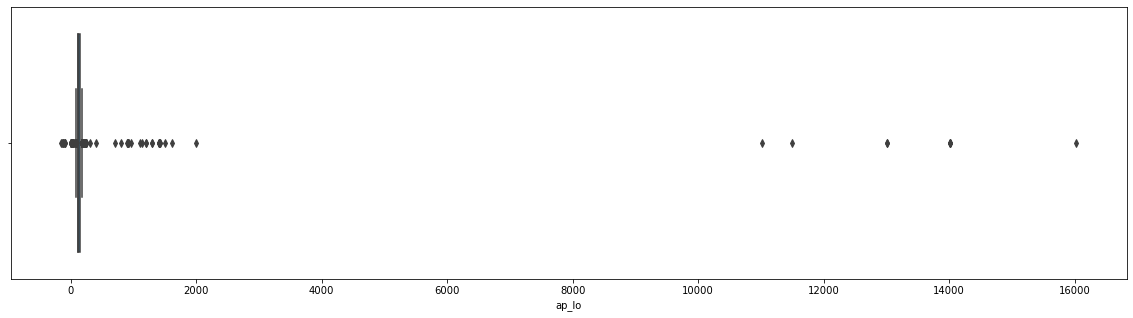

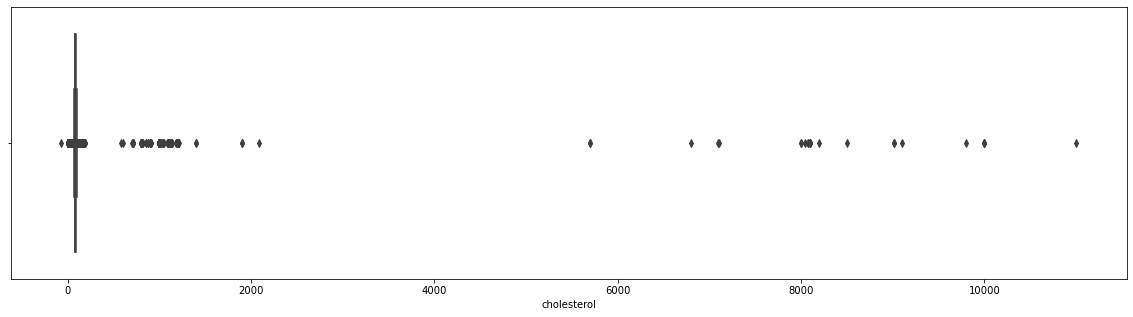

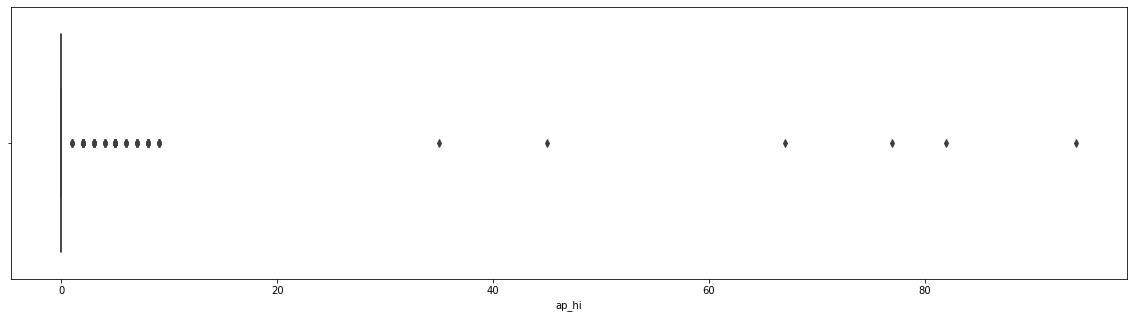

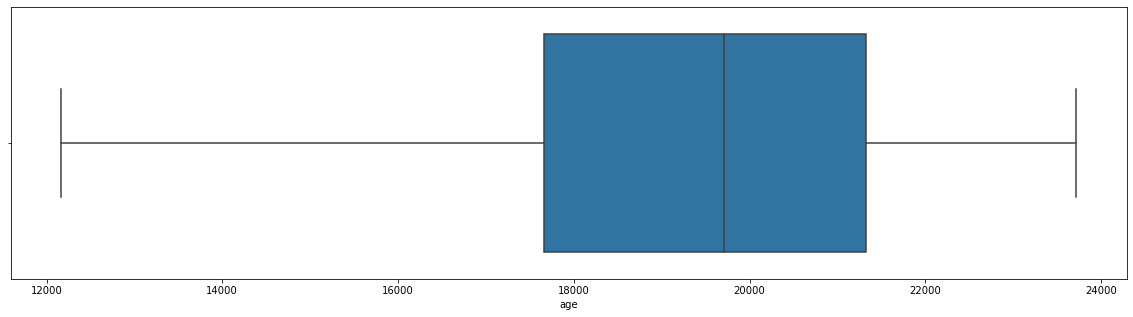

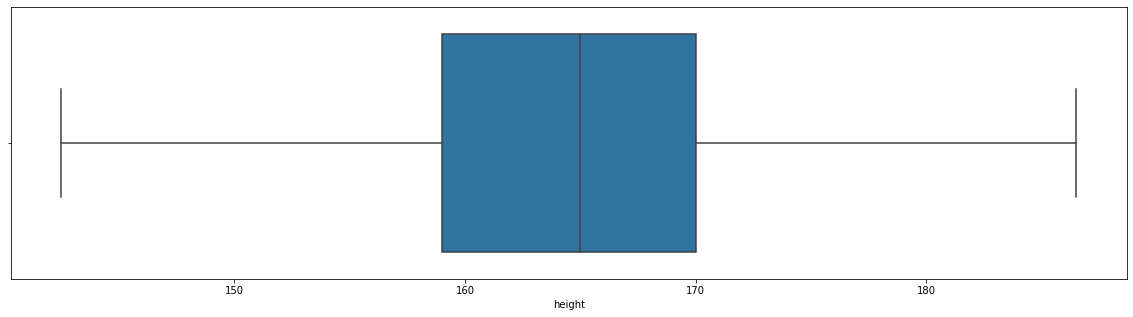

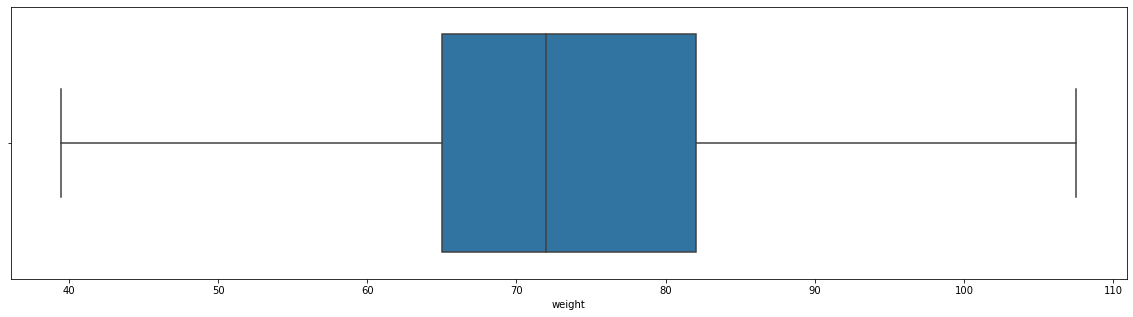

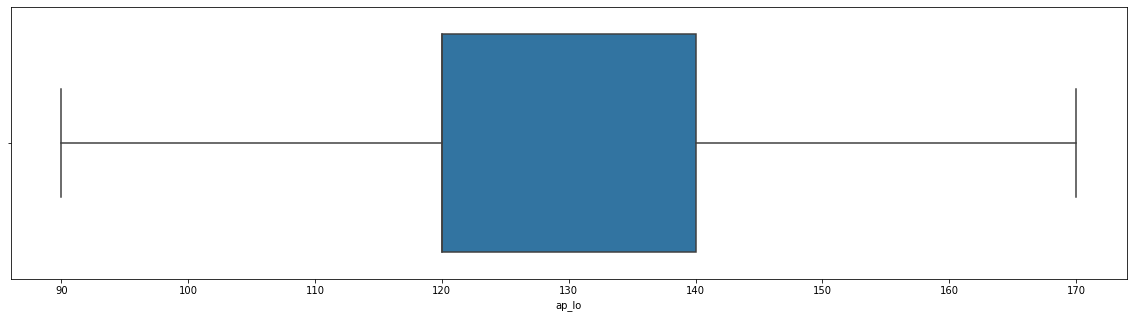

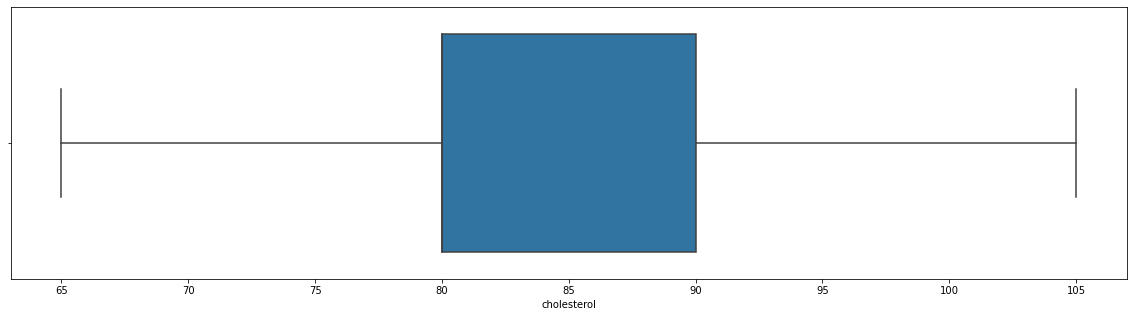

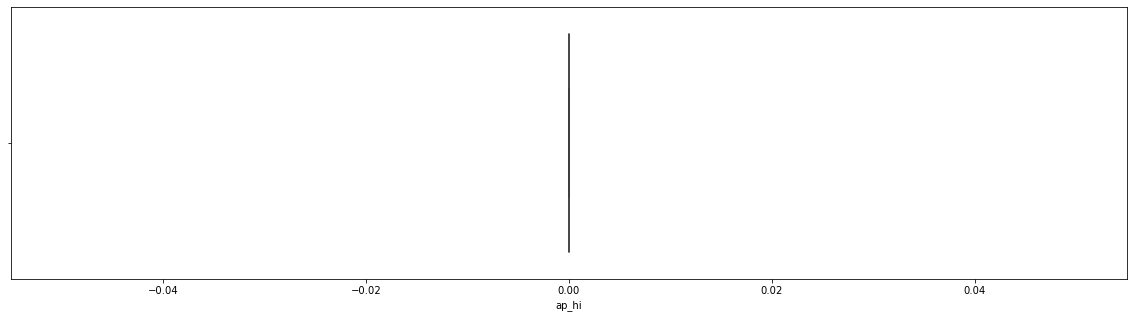

<Figure size 1440x360 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("cardio_train.csv")

data.head()
import matplotlib.pyplot as plt
import seaborn as sns
X=data.iloc[:,1:-1].to_numpy()
y=data.iloc[:,-1:].to_numpy().squeeze()
colu = data.iloc[:,1:-1]
# print(colu.columns)
def outlier(coloumn):
    Q1 = coloumn.quantile(0.25)
    Q3 = coloumn.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    coloumn=np.where(coloumn>upper_whisker,upper_whisker,np.where(coloumn<lower_whisker,lower_whisker,coloumn))
    return coloumn
numerical_cols=['age','height','weight','ap_lo','cholesterol','ap_hi']

for feature in numerical_cols:
    sns.boxplot(data[feature])
    plt.figure(figsize=(20,5))
    
for i in data.iloc[:,1:-1]:
    data[i] = outlier(data[i])
    
for feature in numerical_cols:
    sns.boxplot(data[feature])
    plt.figure(figsize=(20,5))
    
from numpy import isnan
from sklearn.impute import KNNImputer
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer(missing_values=np.nan)
# fit on the dataset
imputer.fit(X)
# transform the dataset
features_trans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(features_trans).flatten()))
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=8)

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

print("X train shape: ", x_train.shape)
print("X validation shape: ", x_val.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y validation shape: ", y_val.shape)
print("Y test shape: ", y_test.shape)
data.shape

In [2]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=10,tol=0.000000001).fit(x_train, y_train)
clf.predict(x_test)
clf.score(x_test, y_test)

Iteration 1, loss = 15.35106439
Iteration 2, loss = 12.24865646
Iteration 3, loss = 10.09030407
Iteration 4, loss = 9.58058962
Iteration 5, loss = 9.03690445
Iteration 6, loss = 3.91714220
Iteration 7, loss = 3.47032753
Iteration 8, loss = 1.82800214
Iteration 9, loss = 3.00176480
Iteration 10, loss = 1.04621425
Iteration 11, loss = 1.40409245
Iteration 12, loss = 1.07601278
Iteration 13, loss = 1.16659226
Iteration 14, loss = 0.71785654
Iteration 15, loss = 3.42096464
Iteration 16, loss = 0.71238205
Iteration 17, loss = 0.66059797
Iteration 18, loss = 0.67523562
Iteration 19, loss = 0.68303222
Iteration 20, loss = 0.72984070
Iteration 21, loss = 0.66053858
Iteration 22, loss = 0.66871966
Iteration 23, loss = 0.68006858
Iteration 24, loss = 0.67612884
Iteration 25, loss = 0.65161301
Iteration 26, loss = 0.81673646
Iteration 27, loss = 0.64081342
Iteration 28, loss = 0.65556010
Iteration 29, loss = 0.73538727
Iteration 30, loss = 0.66828083
Iteration 31, loss = 0.64705902
Iteration 32, 

0.4962857142857143